In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.8 MB/s eta 0:00:00


In [12]:
!pip install JSAnimation

  Preparing metadata (setup.py) ... done
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11404 sha256=f2f533635ee8dc5194031165493d84f5b549c88fdf43e2a8fbf885b391bef15f
  Stored in directory: /root/.cache/pip/wheels/1e/16/64/028f540fe8f5eae5026a423bfd88356248074379b79f27b646
Successfully built JSAnimation


In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

env = gym.make('Taxi-v3', render_mode="rgb_array")
obs, info = env.reset()

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]], dtype=uint8)
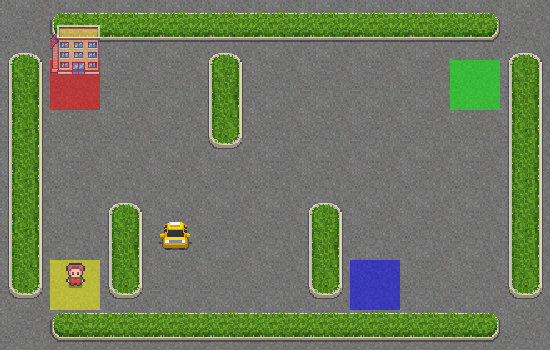

In [2]:
env.render()

In [3]:
m = env.observation_space.n # size of the state space
n = env.action_space.n # size of action space
print("The Q-table will have {} rows and {} columns, resulting in \ total {} entries".format(m,n,m*n))

# Intialize the Q-table and hyperparameters
gamma = 0.97
max_episode = 1000
max_steps = 100
alpha = 0.7
epsilon = 0.3

Q = np.zeros([m,n])


The Q-table will have 500 rows and 6 columns, resulting in \ total 3000 entries


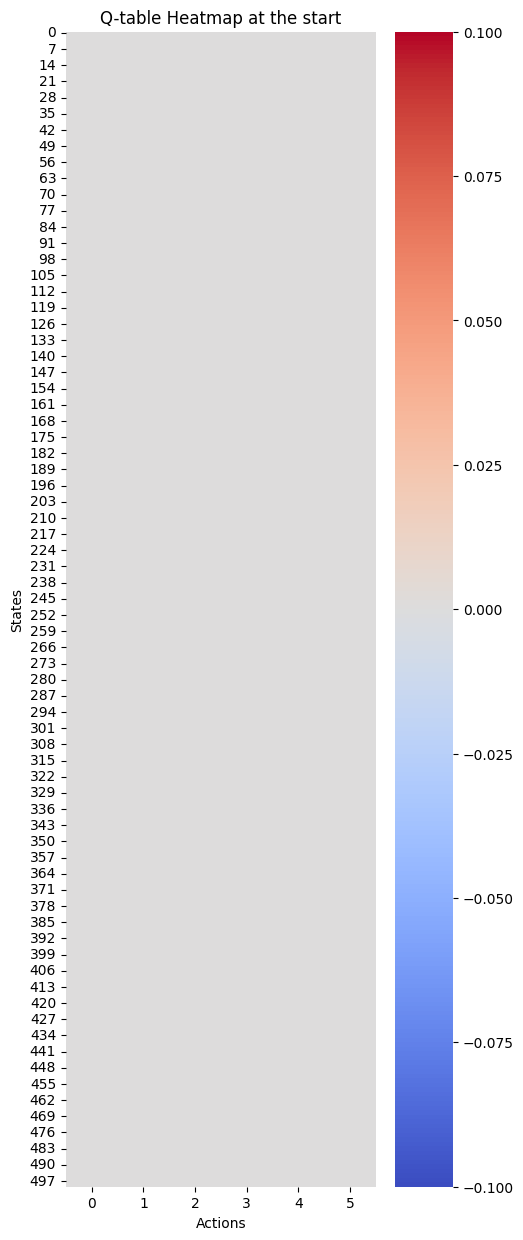

In [4]:
plt.figure(figsize=(5, 15))
sns.heatmap(Q, annot=False, cmap='coolwarm')
plt.title('Q-table Heatmap at the start')
plt.xlabel('Actions')
plt.ylabel('States')
plt.show()

In [5]:

for i in range(max_episode):
  # Start with new environment
  s = env.reset()
  state_index = s[0]
  done = False
  for _ in range(max_steps):
    # Choose an action based on epsilon greedy algorithm
    p = np.random.rand()
    if p > epsilon or (not np.any(Q[state_index,:])):
      a = env.action_space.sample() #explore
    else:
      a = np.argmax(Q[state_index,:]) # exploit
    s_new, r, terminated, truncated, _ = env.step(a)
    #print(s_new)
    #state_index_new = s_new[0]
    # Update Q-table
    Q[state_index,a] = (1-alpha)*Q[state_index,a] + alpha*(r + gamma*np.max(Q[s_new,:]))
    #print(Q[s,a],r)
    s = s_new
    state_index = s#[0]
    if terminated or truncated:
      break


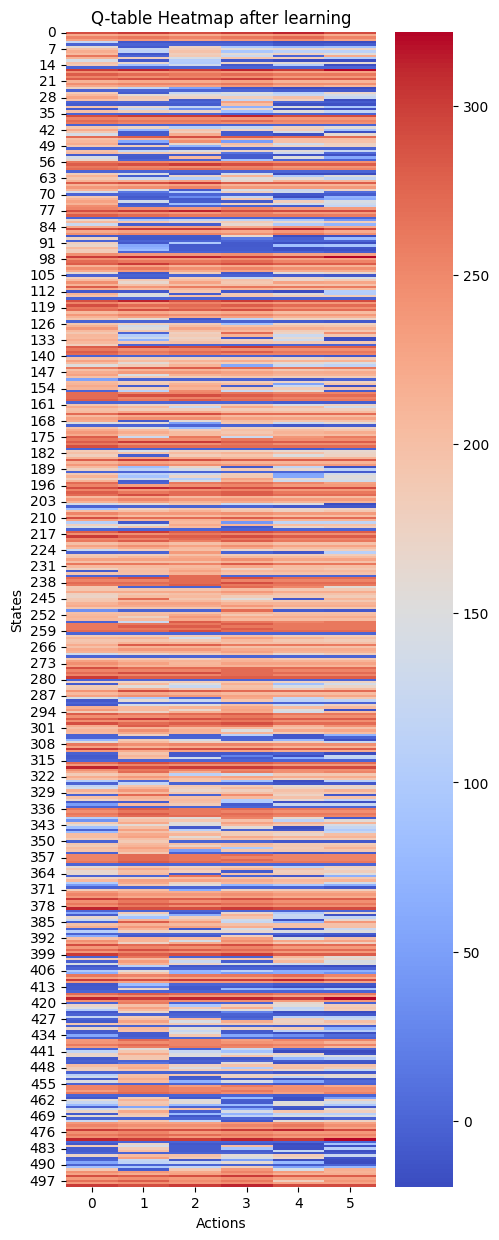

In [6]:
plt.figure(figsize=(5, 15))
sns.heatmap(Q, annot=False, cmap='coolwarm')
plt.title('Q-table Heatmap after learning')
plt.xlabel('Actions')
plt.ylabel('States')
plt.show()


In [15]:
s = env.reset()
done = False
frames = []
frames.append(env.render())

s = s[0]
step_starting_index = 0
episode_index = 0
max_steps = 400
# Test the learned Agent
for i in range(max_steps):
  a = np.argmax(Q[s,:])
  s, _, terminated, truncated, _ = env.step(a)
  frames.append(env.render())
  if terminated or truncated:
    break


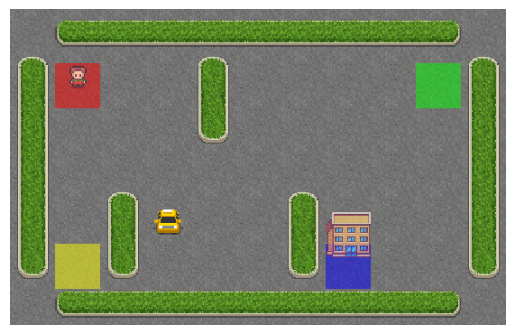

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


fig, ax = plt.subplots()
ax.axis('off')  # Turn off axes

patch = ax.imshow(frames[0], animated=True)

def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=100)

HTML(anim.to_jshtml())

In [17]:
anim.save('animation.mp4', writer='ffmpeg')